<a href="https://colab.research.google.com/github/NSR9/EVA4/blob/master/S11/S11_mainfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')            #Mounting Google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# add path to our library in default search path
import sys
sys.path.append('/content/drive/My Drive/S11')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


  pip install torch-lr-finder -v --global-option="amp"


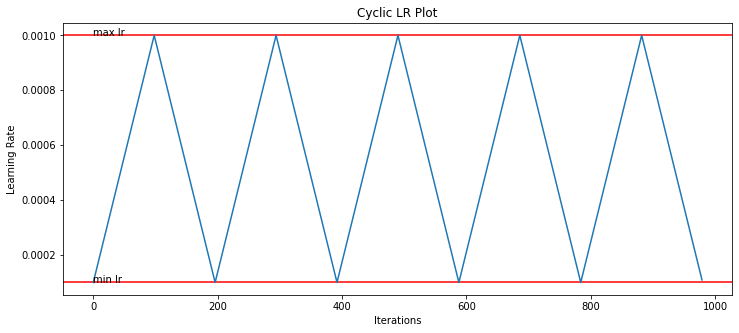

In [3]:

!pip install torchsummary                #
!pip install albumentations              #  PIP Installations and MatplotLib
                                         

from Chay import *                       # Pytorch dependencies

# #importing Our Custom python modules
# import ViewData                          # Library to view the train and test data
# import Dataloaders                       # generic module for data loaders
# import cifar10_models as models          # Custom network
# import resnet as rsnet                   # Resnet source
# import execute                           # Train test models
# import data_transform as dt              # import data_transform
# from lr_finder import LRFinder           # Lrfinder source
# from Albumentations import albTransforms # Albumentaions
# from Dataloaders import DataLoadersClass
from pytorchMod import *

In [4]:
# trainloader and testloader
tl = dt.DataTransformandLoad()
trainloader, testloader = tl.TransformAndLoad()


Files already downloaded and verified
Files already downloaded and verified


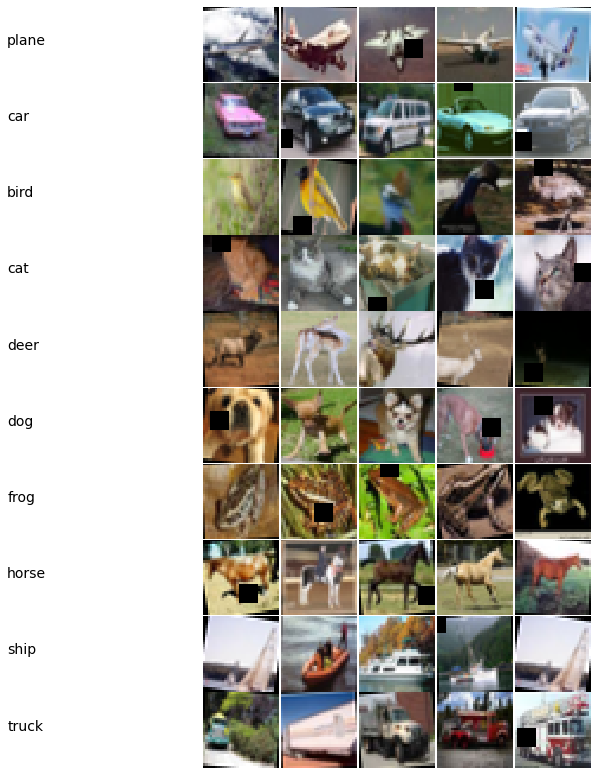

In [5]:
ViewData.class_images(trainloader)
                #To View the train images


In [6]:
#GPU Usage
use_cuda = torch.cuda.is_available()    #using cuda for nvidia based gpu

if use_cuda:                            #Validating gpu presence
  device = torch.device("cuda")
else:
  device = torch.device("cpu")   

print(device)

cuda


In [7]:
#Model creation

#model =  rsnet.ResNet18().to(device)
model =  models.main11().to(device)
criterion = nn.NLLLoss()
# View summary of the model

summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
           Conv2d-10          [-1, 128, 16, 16]         147,456
      BatchNorm2d-11          [-1, 128, 16, 16]             256
       BasicBlock-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         295,168
        MaxPool2d-14            [-1, 25

/content/drive/My Drive/S11/cifar10_models.py:119: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(outX)


/content/drive/My Drive/S11/cifar10_models.py:119: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(outX)


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


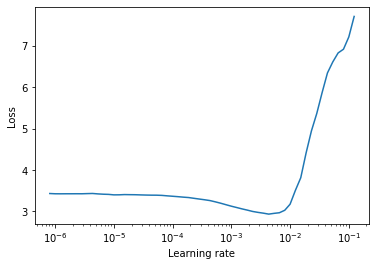

plotted


In [8]:
optimizer = optim.SGD(model.parameters(),lr=1e-7, weight_decay=1e-2)
execute.executeLr_finder(model,optimizer,device,trainloader,criterion)     # To find best LR and plotiing the variation of LR's w.r.t Loss

/content/drive/My Drive/S11/cifar10_models.py:119: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(outX)


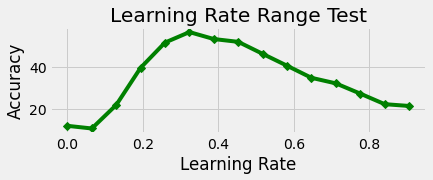

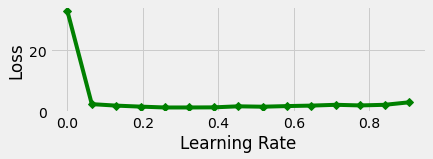

In [9]:
model1 = execute.Test_Train()
import cyclicLR
epochs = 15
cyclicLR.lr_rangetest(device,model, trainloader,
                criterion,  
                0.0001, 
                0.01, 
                epochs,
                weight_decay=0.05,
                pltTest=True)

In [0]:
EPOCHS = 25
optimizer = optim.SGD(model.parameters(), lr = 0.1, momentum=0.9,  nesterov = True) 
scheduler1 = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr =0.3882, total_steps=2400, epochs = 24, steps_per_epoch=len(trainloader),
                                                pct_start=5/EPOCHS, anneal_strategy='linear', cycle_momentum=False, 
                                                base_momentum=0.85, max_momentum=0.95, div_factor=8)

learningRates=[]
incorrect_samples = []
for epoch in range(1,EPOCHS+1):
  print("EPOCH:", epoch)
  model1.train(model, device, trainloader, optimizer, epoch, scheduler1,criterion)
  model1.test(model, device, testloader,incorrect_samples,"model.pt",scheduler1,criterion)
  scheduler1.step(model1.test_losses[epoch-1])
  for param_group in optimizer.param_groups:
    #print('Learning Rate = {a} for EPOCH {e}'.format(a = round(param_group['lr'],5), e=epoch+1))
    learningRates.append(param_group['lr'])

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH:  1


/content/drive/My Drive/EVA4/updLib2/evaLibrary/customNet.py:122: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(outX)
Loss=1.5430012941360474 Batch_id=97 Accuracy=35.22: 100%|██████████| 98/98 [00:16<00:00,  5.99it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 1.3590).  Saving model ...

Test set: Average loss: 1.3590, Accuracy: 4906/10000 (49.06%)

Learning Rate = 0.00674 for EPOCH 2
EPOCH:  2


Loss=1.2717164754867554 Batch_id=97 Accuracy=50.76: 100%|██████████| 98/98 [00:16<00:00,  5.98it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.5191, Accuracy: 5395/10000 (53.95%)

Learning Rate = 0.012 for EPOCH 3
EPOCH:  3


Loss=1.0271655321121216 Batch_id=97 Accuracy=59.41: 100%|██████████| 98/98 [00:16<00:00,  5.96it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (1.3590 --> 0.9671).  Saving model ...

Test set: Average loss: 0.9671, Accuracy: 6707/10000 (67.07%)

Learning Rate = 0.01726 for EPOCH 4
EPOCH:  4


Loss=0.9532467722892761 Batch_id=97 Accuracy=65.11: 100%|██████████| 98/98 [00:16<00:00,  5.98it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.0276, Accuracy: 6363/10000 (63.63%)

Learning Rate = 0.02252 for EPOCH 5
EPOCH:  5


Loss=1.1825652122497559 Batch_id=97 Accuracy=68.81: 100%|██████████| 98/98 [00:16<00:00,  6.04it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.1322, Accuracy: 6693/10000 (66.93%)

Learning Rate = 0.02779 for EPOCH 6
EPOCH:  6


Loss=0.7077917456626892 Batch_id=97 Accuracy=72.83: 100%|██████████| 98/98 [00:16<00:00,  5.94it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (0.9671 --> 0.6560).  Saving model ...

Test set: Average loss: 0.6560, Accuracy: 7649/10000 (76.49%)

Learning Rate = 0.0266 for EPOCH 7
EPOCH:  7


Loss=0.7320030331611633 Batch_id=97 Accuracy=76.69: 100%|██████████| 98/98 [00:16<00:00,  5.93it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (0.6560 --> 0.6244).  Saving model ...

Test set: Average loss: 0.6244, Accuracy: 7870/10000 (78.70%)

Learning Rate = 0.02514 for EPOCH 8
EPOCH:  8


Loss=0.5680533647537231 Batch_id=97 Accuracy=79.11: 100%|██████████| 98/98 [00:16<00:00,  5.99it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6884, Accuracy: 8002/10000 (80.02%)

Learning Rate = 0.02368 for EPOCH 9
EPOCH:  9


Loss=0.5387528538703918 Batch_id=97 Accuracy=81.00: 100%|██████████| 98/98 [00:16<00:00,  5.93it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (0.6244 --> 0.5786).  Saving model ...

Test set: Average loss: 0.5786, Accuracy: 8213/10000 (82.13%)

Learning Rate = 0.02222 for EPOCH 10
EPOCH:  10


Loss=0.4227910339832306 Batch_id=97 Accuracy=82.49: 100%|██████████| 98/98 [00:16<00:00,  5.97it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (0.5786 --> 0.3895).  Saving model ...

Test set: Average loss: 0.3895, Accuracy: 8424/10000 (84.24%)

Learning Rate = 0.02076 for EPOCH 11
EPOCH:  11


Loss=0.5307521820068359 Batch_id=97 Accuracy=83.87: 100%|██████████| 98/98 [00:16<00:00,  5.99it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4690, Accuracy: 8351/10000 (83.51%)

Learning Rate = 0.01931 for EPOCH 12
EPOCH:  12


Loss=0.3876503109931946 Batch_id=97 Accuracy=85.08: 100%|██████████| 98/98 [00:16<00:00,  5.90it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5401, Accuracy: 8514/10000 (85.14%)

Learning Rate = 0.01785 for EPOCH 13
EPOCH:  13


Loss=0.39318379759788513 Batch_id=97 Accuracy=85.96: 100%|██████████| 98/98 [00:16<00:00,  6.04it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (0.3895 --> 0.3861).  Saving model ...

Test set: Average loss: 0.3861, Accuracy: 8534/10000 (85.34%)

Learning Rate = 0.01639 for EPOCH 14
EPOCH:  14


Loss=0.3470646142959595 Batch_id=97 Accuracy=87.24: 100%|██████████| 98/98 [00:16<00:00,  6.01it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (0.3861 --> 0.3719).  Saving model ...

Test set: Average loss: 0.3719, Accuracy: 8605/10000 (86.05%)

Learning Rate = 0.01493 for EPOCH 15
EPOCH:  15


Loss=0.3942098617553711 Batch_id=97 Accuracy=88.32: 100%|██████████| 98/98 [00:16<00:00,  5.96it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3995, Accuracy: 8614/10000 (86.14%)

Learning Rate = 0.01347 for EPOCH 16
EPOCH:  16


Loss=0.25187841057777405 Batch_id=97 Accuracy=88.81: 100%|██████████| 98/98 [00:16<00:00,  5.94it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4002, Accuracy: 8632/10000 (86.32%)

Learning Rate = 0.01201 for EPOCH 17
EPOCH:  17


Loss=0.31911975145339966 Batch_id=97 Accuracy=89.69: 100%|██████████| 98/98 [00:16<00:00,  5.94it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3890, Accuracy: 8702/10000 (87.02%)

Learning Rate = 0.01055 for EPOCH 18
EPOCH:  18


Loss=0.22628377377986908 Batch_id=97 Accuracy=90.39: 100%|██████████| 98/98 [00:16<00:00,  6.01it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4641, Accuracy: 8716/10000 (87.16%)

Learning Rate = 0.00909 for EPOCH 19
EPOCH:  19


Loss=0.22087712585926056 Batch_id=97 Accuracy=91.12: 100%|██████████| 98/98 [00:16<00:00,  6.00it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (0.3719 --> 0.3645).  Saving model ...

Test set: Average loss: 0.3645, Accuracy: 8691/10000 (86.91%)

Learning Rate = 0.00763 for EPOCH 20
EPOCH:  20


Loss=0.2925671637058258 Batch_id=97 Accuracy=91.85: 100%|██████████| 98/98 [00:16<00:00,  5.95it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (0.3645 --> 0.3058).  Saving model ...

Test set: Average loss: 0.3058, Accuracy: 8827/10000 (88.27%)

Learning Rate = 0.00617 for EPOCH 21
EPOCH:  21


Loss=0.19671748578548431 Batch_id=97 Accuracy=92.23: 100%|██████████| 98/98 [00:16<00:00,  6.01it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3216, Accuracy: 8839/10000 (88.39%)

Learning Rate = 0.00472 for EPOCH 22
EPOCH:  22


Loss=0.1904577910900116 Batch_id=97 Accuracy=92.86: 100%|██████████| 98/98 [00:16<00:00,  5.95it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4843, Accuracy: 8825/10000 (88.25%)

Learning Rate = 0.00326 for EPOCH 23
EPOCH:  23


Loss=0.21792027354240417 Batch_id=97 Accuracy=93.29: 100%|██████████| 98/98 [00:16<00:00,  6.00it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3090, Accuracy: 8884/10000 (88.84%)

Learning Rate = 0.0018 for EPOCH 24
EPOCH:  24


Loss=0.1875913292169571 Batch_id=97 Accuracy=93.91: 100%|██████████| 98/98 [00:16<00:00,  6.03it/s]



Test set: Average loss: 0.3944, Accuracy: 8920/10000 (89.20%)

Learning Rate = 0.00034 for EPOCH 25


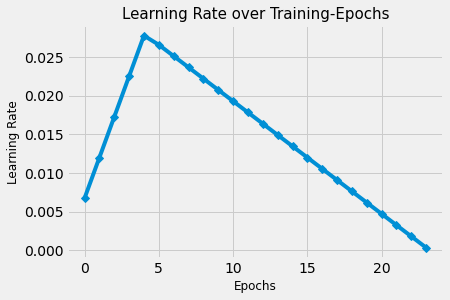

In [0]:
with plt.style.context('fivethirtyeight'):
  plt.plot(learningRates, '-D')
  plt.xlabel('Epochs', fontsize=12)
  plt.ylabel('Learning Rate', fontsize=12)
  plt.title('Learning Rate over Training-Epochs',fontsize=15)